In [1]:
import json

In [4]:
#product general information and Raing stats

In [10]:
import pandas as pd
df2 = pd.read_json ('second.json')

In [5]:
# product reviews and other customer details

In [6]:
import pandas as pd
df3 = pd.read_json ('third.json')

In [7]:
df.head()

,name,stars,total_rating,5-star,4-star,3-star,2-star,1-star
0,"Gotham Greens Butterhead Lettuce, 4.5 oz",4.7 out of 5 stars,858 global ratings,\n \n 83%\n ...,\n \n 11%\n ...,\n \n 4%\n ...,\n \n 1%\n ...,\n \n 1%\n ...


In [8]:
df3.head()

,name,stars,comment,date,verified
0,Sheri A Tell,2.0 out of 5 stars,"\n Thought this lettuce was pre-washed, but i...","Reviewed in the United States on August 6, 2020",Verified Purchase
1,DeeLuv,5.0 out of 5 stars,\n I am following a low carb lifestyle and do...,"Reviewed in the United States on December 20, ...",Verified Purchase
2,Eugene,5.0 out of 5 stars,\n We love the taste of this salad and the fa...,"Reviewed in the United States on July 27, 2020",Verified Purchase
3,Val K,5.0 out of 5 stars,"\n This was very good, crispy, nice large pie...","Reviewed in the United States on January 1, 2020",Verified Purchase
4,o,5.0 out of 5 stars,\n IMO this is SO much better than the butter...,"Reviewed in the United States on August 16, 2020",Verified Purchase


In [12]:
#pre processing the dataframe to be able to work on it

In [13]:
def comm_strip(b):
    b = b.rstrip()
    b = b.replace('\n','')
    b = str(b)
    return b

In [14]:
df3['comment'] = df3['comment'].apply(comm_strip)

In [15]:
df3.head()

,name,stars,comment,date,verified
0,Sheri A Tell,2.0 out of 5 stars,"Thought this lettuce was pre-washed, but it ...","Reviewed in the United States on August 6, 2020",Verified Purchase
1,DeeLuv,5.0 out of 5 stars,I am following a low carb lifestyle and don'...,"Reviewed in the United States on December 20, ...",Verified Purchase
2,Eugene,5.0 out of 5 stars,We love the taste of this salad and the fact...,"Reviewed in the United States on July 27, 2020",Verified Purchase
3,Val K,5.0 out of 5 stars,"This was very good, crispy, nice large piece...","Reviewed in the United States on January 1, 2020",Verified Purchase
4,o,5.0 out of 5 stars,IMO this is SO much better than the butter l...,"Reviewed in the United States on August 16, 2020",Verified Purchase


In [16]:
#using regular expressions to remove unnecsary text

In [17]:
import re
def star_conv(s):
    s = str(s)
    x = re.search("\s", s)
    s = float(s[0:int(x.start())])
    return s

In [19]:
def date_conv(d):
    d = str(d)
    x = re.search("on", d)
    d = d[int(x.end()+1):]
    return d

In [20]:
df3['date'] = df3['date'].apply(date_conv) 

In [21]:
df3['stars'] = df3['stars'].apply(star_conv)

In [22]:
#similary for product dataframe as well

In [23]:
def strip_func(a):
    a = a.rstrip()
    a = a.replace('\n','')
    a = a.replace(' ','')
    a = float(a.strip('%'))/100
    return a

In [24]:
df2['5-star'] = df2['5-star'].apply(strip_func)

In [25]:
df2['4-star']= df2['4-star'].apply(strip_func)
df2['3-star'] = df2['3-star'].apply(strip_func)
df2['2-star'] = df2['2-star'].apply(strip_func)
df2['1-star'] = df2['1-star'].apply(strip_func)

In [26]:
df2['stars'] = df2['stars'].apply(star_conv)

In [27]:
df2.head()

,name,stars,total_rating,5-star,4-star,3-star,2-star,1-star
0,"Gotham Greens Butterhead Lettuce, 4.5 oz",4.7,858 global ratings,0.83,0.11,0.04,0.01,0.01


In [28]:
def tot_rat(a):
    x = re.search("global",a)
    x = a[0:x.start()-1]
    return int(x)

In [29]:
df2['total_rating'] = df2['total_rating'].apply(tot_rat)

In [30]:
df2.head()

,name,stars,total_rating,5-star,4-star,3-star,2-star,1-star
0,"Gotham Greens Butterhead Lettuce, 4.5 oz",4.7,858,0.83,0.11,0.04,0.01,0.01


In [31]:
df3.head()

,name,stars,comment,date,verified
0,Sheri A Tell,2.0,"Thought this lettuce was pre-washed, but it ...","August 6, 2020",Verified Purchase
1,DeeLuv,5.0,I am following a low carb lifestyle and don'...,"December 20, 2019",Verified Purchase
2,Eugene,5.0,We love the taste of this salad and the fact...,"July 27, 2020",Verified Purchase
3,Val K,5.0,"This was very good, crispy, nice large piece...","January 1, 2020",Verified Purchase
4,o,5.0,IMO this is SO much better than the butter l...,"August 16, 2020",Verified Purchase


In [32]:
#convering August XX,XXXX format to YYYY-DD-MM

In [33]:
from datetime import datetime
def date_make(a):
    a = datetime.strptime(a, "%B %d, %Y")
    return a

In [34]:
df3['date'] = df3['date'].apply(date_make)

In [35]:
df3.head()

,name,stars,comment,date,verified
0,Sheri A Tell,2.0,"Thought this lettuce was pre-washed, but it ...",2020-08-06,Verified Purchase
1,DeeLuv,5.0,I am following a low carb lifestyle and don'...,2019-12-20,Verified Purchase
2,Eugene,5.0,We love the taste of this salad and the fact...,2020-07-27,Verified Purchase
3,Val K,5.0,"This was very good, crispy, nice large piece...",2020-01-01,Verified Purchase
4,o,5.0,IMO this is SO much better than the butter l...,2020-08-16,Verified Purchase


In [36]:
import seaborn as sns

In [37]:
#plot on user given stars on reviews

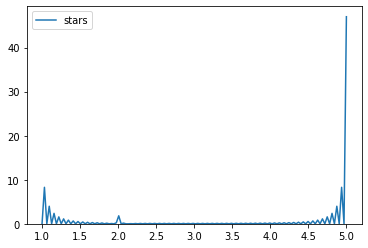

In [38]:
sns.kdeplot(df3['stars'])

In [39]:
labels = ['5-star','4-star','3-star','2-star','1-star']
s = [df2['5-star'][0]*df2['total_rating'],df2['4-star'][0]*df2['total_rating'],df2['3-star'][0]*df2['total_rating'],df2['2-star'][0]*df2['total_rating'],df2['1-star'][0]*df2['total_rating']]

In [40]:
#df for total rating distribution
dff = pd.DataFrame({
    'Stars':labels,
    'Number of Stars': s})

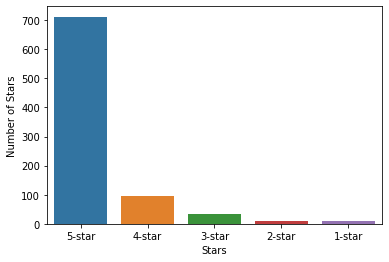

In [41]:
sns.barplot(y=dff['Number of Stars'],x=dff['Stars'])

In [42]:
###################SENTIMENT ANALYSIS####################

In [43]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

In [44]:
headlines = df3['comment']
sia = SIA()
results = []

for line in headlines:
    pol_score = sia.polarity_scores(line)
    pol_score['headline'] = line
    results.append(pol_score)

In [45]:
from pprint import pprint
pprint(results[:3], width=100)

[{'compound': 0.5023,
  'headline': '  Thought this lettuce was pre-washed, but it wasn’t.  Washing and drying each '
              'lettuce leaf is labor intensive.  I prefer lettuce that’s ready to be used right '
              'from the package.',
  'neg': 0.0,
  'neu': 0.893,
  'pos': 0.107},
 {'compound': 0.3818,
  'headline': "  I am following a low carb lifestyle and don't eat bread. I had a turkey burger "
              'and they were the perfect size for the burger.  I am also going to try this with '
              'tuna & chicken salad.',
  'neg': 0.06,
  'neu': 0.833,
  'pos': 0.106},
 {'compound': 0.9585,
  'headline': "  We love the taste of this salad and the fact that it's created in a greenhouse "
              "means it's available all year round! It's fantastic to put in salads, burgers and "
              'anything else you would want lettuce. This lettuce is not bitter at all and has a '
              'nice richness flavor to it. This is the only one we always buy!'

In [47]:
#dataframe from the VADER analyis results

In [46]:
df = pd.DataFrame.from_records(results)
df.head()

,neg,neu,pos,compound,headline
0,0.00,0.893,0.107,0.5023,"Thought this lettuce was pre-washed, but it ..."
1,0.06,0.833,0.106,0.3818,I am following a low carb lifestyle and don'...
2,0.00,0.714,0.286,0.9585,We love the taste of this salad and the fact...
3,0.00,0.784,0.216,0.5300,"This was very good, crispy, nice large piece..."
4,0.00,0.689,0.311,0.9624,IMO this is SO much better than the butter l...


In [49]:
#giving lables

In [48]:
df['label'] = 0
df.loc[df['compound'] > 0.5023, 'label'] = 1
df.loc[df['compound'] <= 0.5023, 'label'] = -1
df.head()

,neg,neu,pos,compound,headline,label
0,0.00,0.893,0.107,0.5023,"Thought this lettuce was pre-washed, but it ...",-1
1,0.06,0.833,0.106,0.3818,I am following a low carb lifestyle and don'...,-1
2,0.00,0.714,0.286,0.9585,We love the taste of this salad and the fact...,1
3,0.00,0.784,0.216,0.5300,"This was very good, crispy, nice large piece...",1
4,0.00,0.689,0.311,0.9624,IMO this is SO much better than the butter l...,1


In [50]:
#NLP for word clouds and frequent words

In [51]:
from nltk.tokenize import word_tokenize, RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')

In [52]:
import nltk
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [53]:
def process_text(headlines):
    tokens = []
    for line in headlines:
        toks = tokenizer.tokenize(line)
        toks = [t.lower() for t in toks if t.lower() not in stop_words]
        tokens.extend(toks)
    
    return tokens

In [59]:
#most common words in postive reviews

In [54]:
pos_lines = list(df[df.label == 1].headline)

pos_tokens = process_text(pos_lines)
pos_freq = nltk.FreqDist(pos_tokens)

pos_freq.most_common(20)

[('lettuce', 6),
 ('fresh', 5),
 ('nice', 4),
 ('love', 3),
 ('good', 3),
 ('best', 3),
 ('taste', 2),
 ('salads', 2),
 ('one', 2),
 ('buy', 2),
 ('large', 2),
 ('tasty', 2),
 ('hearts', 2),
 ('salad', 1),
 ('fact', 1),
 ('created', 1),
 ('greenhouse', 1),
 ('means', 1),
 ('available', 1),
 ('year', 1)]

In [55]:
#plotting distribution of Postive words

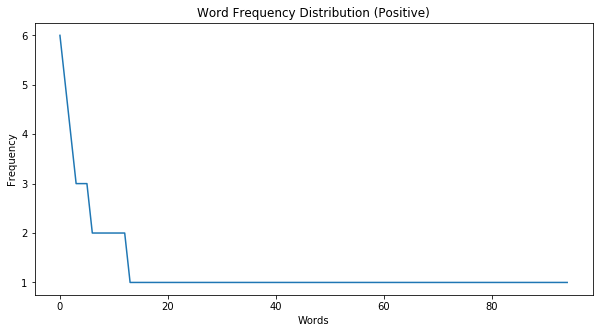

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline
y_val = [x[1] for x in pos_freq.most_common()]

fig = plt.figure(figsize=(10,5))
plt.plot(y_val)

plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution (Positive)")
plt.show()

In [60]:
#most common words in negative reviews

In [58]:
neg_lines = list(df[df.label == -1].headline)

neg_tokens = process_text(neg_lines)
neg_freq = nltk.FreqDist(neg_tokens)

neg_freq.most_common(20)

[('lettuce', 3),
 ('burger', 2),
 ('thought', 1),
 ('pre', 1),
 ('washed', 1),
 ('washing', 1),
 ('drying', 1),
 ('leaf', 1),
 ('labor', 1),
 ('intensive', 1),
 ('prefer', 1),
 ('ready', 1),
 ('used', 1),
 ('right', 1),
 ('package', 1),
 ('following', 1),
 ('low', 1),
 ('carb', 1),
 ('lifestyle', 1),
 ('eat', 1)]

In [61]:
#plotting the word frequency graph

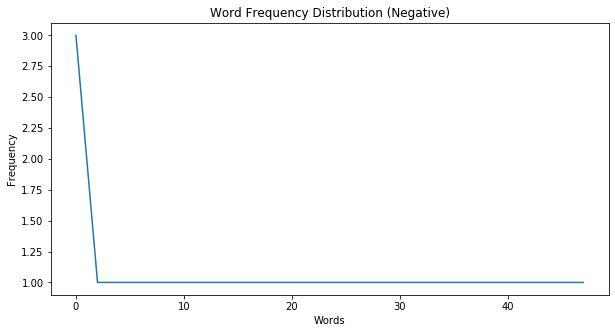

In [62]:
y_val = [x[1] for x in neg_freq.most_common()]

fig = plt.figure(figsize=(10,5))
plt.plot(y_val)

plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution (Negative)")
plt.show()


In [ ]:
#generating words clouds

In [63]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [64]:
#WORD CLOUD FOR POSTIVE REVIEWS

In [65]:
text1 = "".join(review for review in df[df.label == 1].headline)

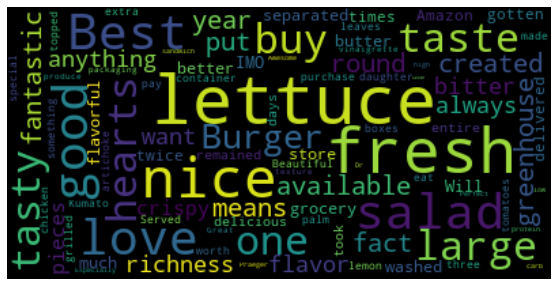

In [66]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="black").generate(text1)
fig = plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [67]:
#WORD CLOUD FOR NEGATIVE REVIEWS

In [68]:
text2 = "".join(review for review in df[df.label == -1].headline)

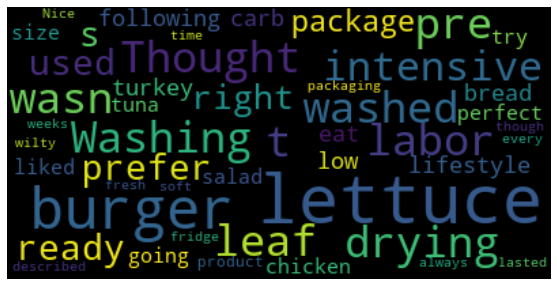

In [69]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="black").generate(text2)
fig = plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()